In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


## Basic checks

In [2]:
df.shape

(924, 8)

In [3]:
df.columns

Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [5]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


## Data Preprocessing

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [8]:
# Filling missing values in Price featute
df['Price'] = df['Price'].fillna(df['Price'].mean()).astype(int)

In [9]:
# dropping irrelavant columns
df.drop(columns=['Unnamed: 0','Lon','Lat'],inplace=True)

In [10]:
df

,Address,Zip,Price,Area,Room
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000,64,3
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000,60,3
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000,109,4
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000,128,6
4,"Winterjanpad 21, Amsterdam",1036 KN,720000,138,5
...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000,117,1
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000,72,3
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000,51,3
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000,113,4


In [11]:
df.drop(columns=['Zip','Address'],inplace=True)

In [12]:
df

,Price,Area,Room
0,685000,64,3
1,475000,60,3
2,850000,109,4
3,580000,128,6
4,720000,138,5
...,...,...,...
919,750000,117,1
920,350000,72,3
921,350000,51,3
922,599000,113,4


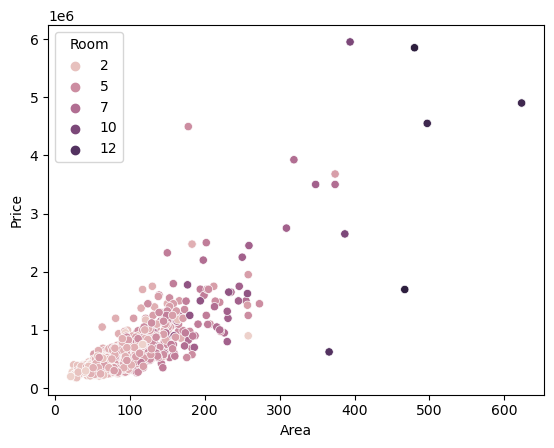

In [13]:
# sns.relplot(x="Area", y="Price", hue="Room", data=df)
sns.scatterplot(x="Area", y="Price", hue="Room", data=df)

plt.show()

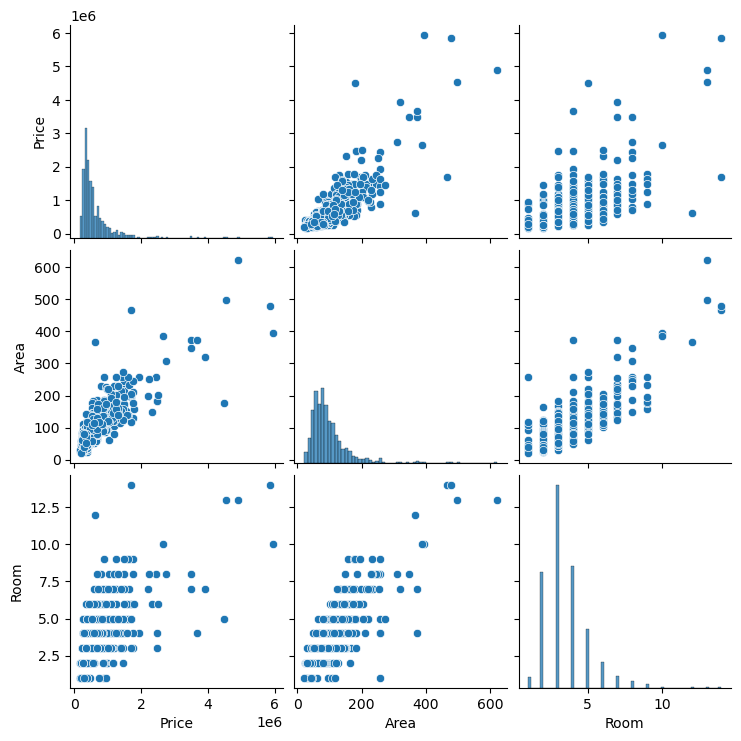

In [14]:
sns.pairplot(df)


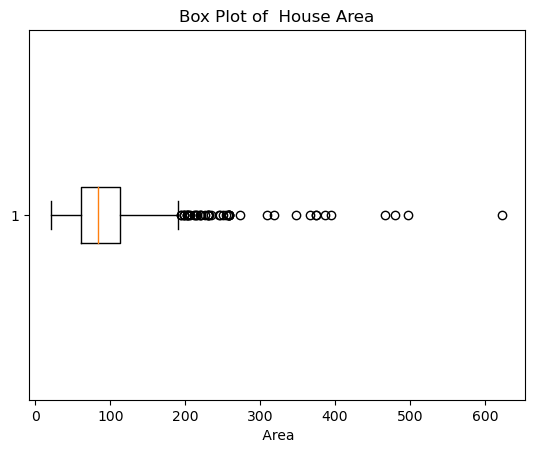

In [15]:
# Create a box plot
# plt.figure(figsize=(8, 6))
plt.boxplot(x='Area', vert=False, data=df)
plt.title('Box Plot of  House Area')
plt.xlabel(' Area')
plt.show()


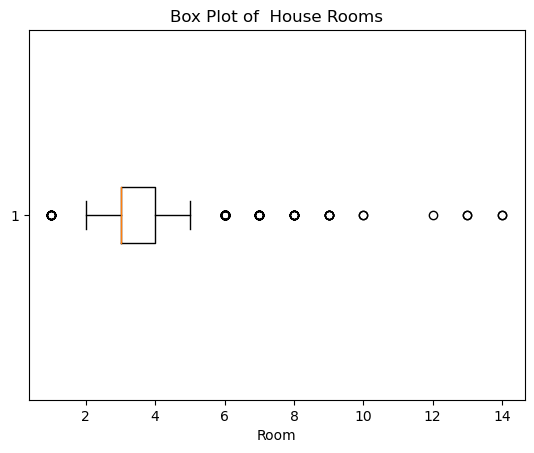

In [16]:
plt.boxplot(x='Room', vert=False, data=df)
plt.title('Box Plot of  House Rooms')
plt.xlabel('Room')
plt.show()

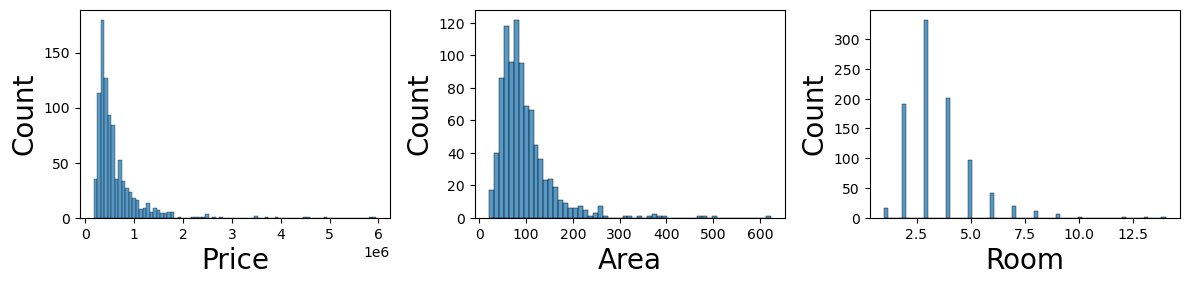

In [17]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=3:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
Q1 = df['Room'].quantile(0.25)
print('lower quartile',Q1)

Q3 = df['Room'].quantile(0.75)
print('Upper quartile',Q3)

IQR = Q3 - Q1

#find lower and upper limit

lower_limit = Q1 - 1.5 * IQR
print('lower limit ',lower_limit)

upper_limit = Q3 + 1.5 * IQR
print('upper limit ',upper_limit)

print("Total no. of records > than upper limit: ",len(df.loc[df['Room']>upper_limit]))
print("Total no. of records < than lower limit: ",len(df.loc[df['Room']<lower_limit]))

print("% of outliers: ",(len(df.loc[df['Room']>upper_limit])/len(df))*100)

lower quartile 3.0
Upper quartile 4.0
lower limit  1.5
upper limit  5.5
Total no. of records > than upper limit:  85
Total no. of records < than lower limit:  17
% of outliers:  9.199134199134198


In [19]:
df.loc[df['Room']>upper_limit,'Room'] = df['Room'].median()
df.loc[df['Room']<lower_limit,'Room'] = df['Room'].median()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Area'] = scaler.fit_transform(df[['Area']])

In [21]:
df

,Price,Area,Room
0,685000,0.071429,3
1,475000,0.064784,3
2,850000,0.146179,4
3,580000,0.177741,3
4,720000,0.194352,5
...,...,...,...
919,750000,0.159468,3
920,350000,0.084718,3
921,350000,0.049834,3
922,599000,0.152824,4


## Train-Test Split

In [22]:
X = df[['Area','Room']]
y = df[['Price']]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)



In [24]:
lr_model = LinearRegression()

In [25]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = lr_model.predict(X_test)

In [27]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentage error: %.2f' % mean_absolute_percentage_error(y_test, y_pred))

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

Coefficient of determination: 0.80
Mean absolute error: 187543.00
Mean absolute percentage error: 0.30
Mean squared error: 98225238181.48
RMSE: 313409.0588695218


In [28]:
X_test.shape

(185, 2)